In [19]:
import pandas as pd

# Load the data (assuming it's a TSV file)
data = pd.read_csv("gwas-association-downloaded_2025-02-18-MONDO_0004975-withChildTraits.tsv", sep='\t')

# Print the columns to see what they are named
print("Available columns:", data.columns.tolist())

Available columns: ['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL', 'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE', 'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS', 'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS', 'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC', 'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)', 'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV', 'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'STUDY ACCESSION', 'GENOTYPING TECHNOLOGY']


In [20]:
# Filter for significant SNPs with p-value < 5e-8
significant_snps = data[data['P-VALUE'] < 5e-8].copy()

# Save the filtered data to an Excel file
significant_snps[['SNP_ID_CURRENT', 'MAPPED_GENE', 'UPSTREAM_GENE_DISTANCE','DOWNSTREAM_GENE_DISTANCE','P-VALUE']].to_excel("significant_snps.xlsx", index=False)

print("Excel file with significant SNPs has been saved as 'significant_snps.xlsx'.")

Excel file with significant SNPs has been saved as 'significant_snps.xlsx'.


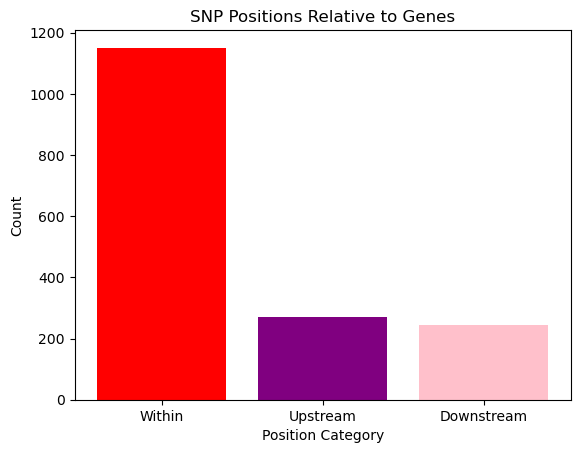

In [13]:
import matplotlib.pyplot as plt

# Categorize positions
significant_snps['position'] = significant_snps['distance'].apply(
    lambda x: 'Within' if x == 0 else 'Upstream' if x > 0 else 'Downstream'
)

# Plot
counts = significant_snps['position'].value_counts()
plt.bar(counts.index, counts.values, color=['red', 'purple', 'pink'])  # Updated colors
plt.title('SNP Positions Relative to Genes')
plt.xlabel('Position Category')
plt.ylabel('Count')

# Save the plot
plt.savefig('snp_positions.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

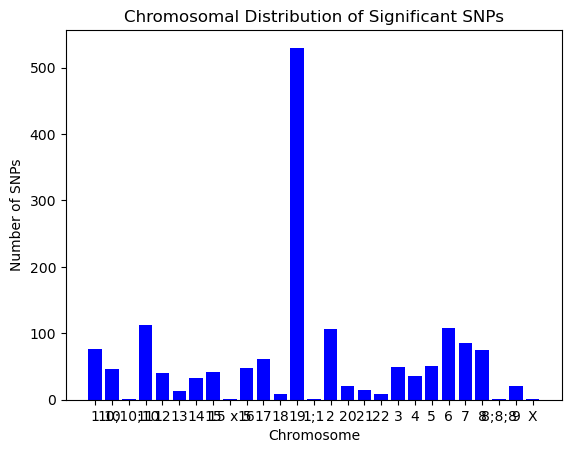

In [ ]:
# Clean chromosome data and count occurrences
chr_counts = significant_snps['CHR_ID'].value_counts().sort_index()

# Plot the data
plt.bar(chr_counts.index.astype(str), chr_counts.values, color='blue')
plt.title('Chromosomal Distribution of Significant SNPs')
plt.xlabel('Chromosome')
plt.ylabel('Number of SNPs')

# Save the plot
plt.savefig('chromosome_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

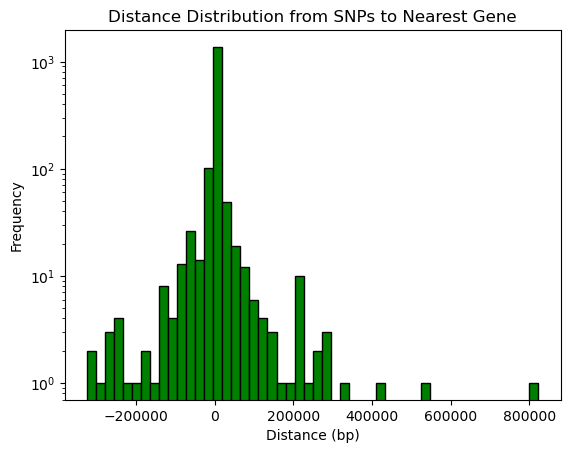

In [ ]:
# Distance Distribution from SNPs to Nearest Gene
# Plot histogram
plt.hist(significant_snps['distance'], bins=50, edgecolor='black', color='green')
plt.title('Distance Distribution from SNPs to Nearest Gene')
plt.xlabel('Distance (bp)')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Save the plot
plt.savefig('distance_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:

gwas_file_path = "gwas-association-downloaded_2025-02-18-MONDO_0004975-withChildTraits.tsv"
eqtl_file_path = "/Volumes/Jagannath/Spring 2025/Systems Biology/EQTL.tsv"

# Load GWAS data
gwas_df = pd.read_csv(gwas_file_path, sep="\t")

# Load eQTL data
eqtl_df = pd.read_csv(eqtl_file_path, sep="\t")

# Fix column names 
# Ensures there are no unwanted spaces that could cause errors when accessing columns or merging data
gwas_df.columns = gwas_df.columns.str.strip()
eqtl_df.columns = eqtl_df.columns.str.strip()

upstream_snps = gwas_df[gwas_df["UPSTREAM_GENE_DISTANCE"] > 0] # Extract upstream SNPs (where distance > 0)
eqtl_results = upstream_snps.merge(eqtl_df, left_on="SNPS", right_on="rsid", how="inner") # Merge upstream SNPs with eQTL dataset based on SNP ID

# Filter for significant eQTLs (p-value < 0.05) using the average effect across brain tissues (aveALL)
eqtl_results_filtered = eqtl_results[eqtl_results["aveALL"] < 0.05]

# Select relevant columns: eQTL SNP, associated gene, p-value, and tissue expression levels
eqtl_results_final = eqtl_results_filtered[["rsid", "geneSymbol", "aveALL", "CRBL", "FCTX", "HIPP", "THAL"]]
eqtl_results_final.rename(columns={"rsid": "eQTL", "geneSymbol": "Associated Gene", "aveALL": "P-Value"}, inplace=True) # Rename columns

# Save results to an Excel file
eqtl_output_path = "significant_eqtls.xlsx"
eqtl_results_final.to_excel(eqtl_output_path, index=False)

# Print confirmation
print(f"Significant eQTLs saved to: {eqtl_output_path}")

# Display first few rows
print(eqtl_results_final.head())

Significant eQTLs saved to: significant_eqtls.xlsx
         eQTL Associated Gene   P-Value  CRBL    FCTX  HIPP  THAL
2   rs4420638          PVRL2   0.043000  0.14  0.0001  0.56   0.3
4   rs4420638          PVRL2   0.043000  0.14  0.0001  0.56   0.3
6   rs4420638          PVRL2   0.043000  0.14  0.0001  0.56   0.3
7   rs7259620           OPA3   0.000063  0.88  0.0150  0.31   0.8
11  rs4420638          PVRL2   0.043000  0.14  0.0001  0.56   0.3


/var/folders/pv/2m5s9svn5tzdnmz917lwq0480000gn/T/ipykernel_49578/291623434.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtl_results_final.rename(columns={"rsid": "eQTL", "geneSymbol": "Associated Gene", "aveALL": "P-Value"}, inplace=True)
